# COGS 108 - Final Project 

# Overview

We are analyzing the similarities and differences in pet features that affect adoption rates between Malaysia and Texas. We found datasets from animal shelter in both Malaysia and Texas. We cleaned both sets up in order to directly compare these datasets. Next, we created several visualizations such as boxplots, stacked bar plots, and decision trees that showed us the potential relationships between pet features and adoption rates. Using decision trees, we analyzed the features age, gender, and color to explore which pet features, if any, have a considerable effect on pet's adoption speed.

# Names

- Maria Tarakji
- Elisa Pham
- Brandon Mazur
- Sunwoo Kim
- Kevin Luong

# Research Question

What are the similarities and differences in pet traits that lead to higher adoption rates between Malaysia and Texas?

## Background and Prior Work

### Background:
In the wake of the COVID-19 pandemic, many pet owners are finding a greater appreciation for their pets during self-isolation. Additionally, those without pets are finding that they want to adopt pets of their own. The result: animals in adoption shelters across the country are in higher demand than ever before. For example, an animal shelter in Florida was recently emptied for the first time in its history. Seeing this, we started to wonder if there are certain features that people tend to look for in adopting pets - specifically, cats and dogs. Every pet deserves to have a place to call home, and we wanted to get into the data and figure out which features of dogs and cats lead to a higher adoption rate.

### Prior Work:
We started looking at studies done by other researchers on our topic of interest. We obtained data involving both dogs and cats, and a list of features that possibly sped up the adoption process. In the dog’s research, we discovered that breed has a high impact on adoption speed. For example, the Brussels Griffon breed is adopted at a very high speed, on average eight days after admittance into the shelter. Additionally, there is “a black dog syndrome” where people tend to avoid dogs with darker colors. We wanted to know what colors are considered more favorable and how that affects the adoption process.

We also studied research published by Hannah Miller, Michael Ward, and Julia A. Beatty. They discovered that the general notion of black cats being less desirable than white cats to be false. In fact, black cats tend to be more desirable than their counterparts. It’s interesting to see the general consensus of what people find desirable when adopting a pet. However, through the research we can see that general stereotypes are not always supported.

References (include links):
- 1) https://community.jmp.com/t5/JMP-Blog/Why-are-some-dogs-adopted-faster-than-others/ba-p/30600#
- 2) 
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6912321/

# Hypothesis


We hypothesize that there are many factors that influence cat and dog adoption rates in Malaysia vs Texas:
- We predict that black cats will be signifcantly less desirable in Texas compared to Malaysia due to cultural stigmas.
- We predict older pets will have longer adoption times in both Malaysia and Texas in both areas due to a human preference for kittens and puppies.

# Dataset(s)

### Dataset 1
- Dataset Name: **PetFinder.my Adoption Prediction**
- Link: https://www.kaggle.com/c/petfinder-adoption-prediction/data
- Variables: *Pet ID, adoption speed, type, name, age, breed1, breed2, gender, color1, color2, color3, maturity size, fur length, vaccinated, dewormed, sterilized, health, quantity, fee, state, rescuer id, video amount, photo amount, description*
- Number of Observations: 14,993
- Brief Intro: This dataset accounts for the incorporation of animals that are brought to Animal Shelters in Malaysia. Each observation includes an encoding of breed, hosting time, color, etc. The data is stored as a CSV file.

### Dataset 2
- Dataset Name: **Austin Animal Center adoption outcome**
- Link: https://data.world/rdowns26/austin-animal-shelter
- Variables: *Animal id, name intake, datetime intake, month year intake, found location, intake type, intake condition, animal type intake, sex, age, breed intake, color intake, name, outcome, datatime outcomes, month year outcomes, outcome type, outcome subtype, sex upon outcome, age upon outcome, gender intake, gender outcome, fixed intake, fixed outcome, fixed change, age bucket, date time length, days length, retriever, sheppard, beagle, terrier, boxer, poodle, rottweiler, doxen, chihuahua, pitbull*
- Number of Observations: 76,976
- Brief Intro: This dataset accounts for the incorporation of animals that are brought to the Austin Animal Center in Texas. Each observation includes breed identifier, captivity time, color, etc. The data is stored as a CSV file.

Since we are comparing these datasets for trends, the data will need to cleaned in such a way that they share the same format.

# Setup

### Import packages

In [1]:
# numpy and pandas
import numpy as np
import pandas as pd

# used for visualizations
import matplotlib.pyplot as plt
from matplotlib import rc

# used for normality tests
from scipy.stats import shapiro

# used for decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree, metrics

### Load datasets

In [2]:
# https://www.kaggle.com/c/petfinder-adoption-prediction/data
malay_df = pd.read_csv('./data/dataset_1/data.csv')

# https://data.world/rdowns26/austin-animal-shelter (may have been updated since)
texas_df = pd.read_csv('./data/dataset_2/all_records.csv')

# Data Cleaning
Before we explore these datasets, they need to be cleaned.

## Steps to Cleaning
- Inspect data for cleanliness
- Reformat data and drop unnecessary features
- Deal with missing / extaneous data

### Inspect data for cleanliness

First let's get a feel for the data:

In [3]:
(malay_df.shape, malay_df.columns)

((14993, 24),
 Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
        'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
        'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
        'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
       dtype='object'))

In [4]:
(texas_df.shape, texas_df.columns)

((76977, 38),
 Index(['Unnamed: 0', 'Animal ID', 'Name_intake', 'DateTime_intake',
        'MonthYear_intake', 'Found_Location', 'Intake_Type', 'IntakeCondition',
        'Animal_Type_intake', 'Sex', 'Age', 'Breed_intake', 'Color_intake',
        'Name_outcome', 'DateTime_outcome', 'MonthYear_outcome', 'Outcome_Type',
        'Outcome_Subtype', 'Sex_upon_Outcome', 'Age_upon_Outcome',
        'gender_intake', 'gender_outcome', 'fixed_intake', 'fixed_outcome',
        'fixed_changed', 'Age_Bucket', 'retriever', 'shepherd', 'beagle',
        'terrier', 'boxer', 'poodle', 'rottweiler', 'dachshund', 'chihuahua',
        'pit bull', 'DateTime_length', 'Days_length'],
       dtype='object'))

A quick view of these datasets reveals they are both sizable datasets (the Malaysia dataset is smaller than the Texas dataset). Additionally, we see that the two datasets are quite different in their formatting. This needs to be fixed.

First we will reformat Malaysia dataset. Most of the data is encoded in this dataset:

In [5]:
print(malay_df['Type'].unique())
print(malay_df['Gender'].unique())
print(malay_df['Color1'].unique())
print(malay_df['AdoptionSpeed'].unique())

[2 1]
[1 2 3]
[1 2 5 6 3 7 4]
[2 0 3 1 4]


With this in mind, we can reformat the data.

### Reformat data and drop unnecessary columns

The encodings for the Malaysia data are provided in separate `.csv` files listed at https://www.kaggle.com/c/petfinder-adoption-prediction/data. We will use these to decode the dataset. As we decode, pets with multiple colors will be re-branded as `Multicolor` during decoding to prevent ambiguity. Note that the `AdoptionSpeed` in `malay_df` is broken up into 5 categories:
- Less than 1 day for adoption
- Less than 1 week for adoption
- Less than 1 month for adoption
- Less than 3 months for adoption
- Greater than 100 days for adoption

For consistency with `texas_df` we decided to combine the first two categories and rename the last category to "Greater than 3 months". Finally, unecessary data will be dropped.

In [6]:
def reformat_malay_data(df):

    # read in helper-data
    color_df = pd.read_csv('./data/dataset_1/color_labels.csv')
    color_dict = dict(zip(list(color_df['ColorID']), list(color_df['ColorName'])))

    # reformat data
    df['Type'] = df['Type'].replace([1, 2], ['Dog', 'Cat'])
    df['Gender'] = df['Gender'].replace([1, 2, 3], ['Male', 'Female', 'Mixed'])
    df['Color'] = df.apply(lambda row : color_dict[row['Color1']] if row['Color2'] == 0 else 'Multicolor', axis = 1)
    df['Color'] = df['Color'].apply(lambda x : 'Yellow' if x == 'Golden' or x == 'Cream' else x)
    df['AdoptionSpeed'] = df['AdoptionSpeed'].replace([0, 1, 2, 3, 4], ['< 1 week', '< 1 week', '< 1 month', '< 3 months', '> 3 months'])

    # drop unecessary rows
    df = df.drop(['Name', 'Breed1', 'Breed2',
                  'Vaccinated', 'Dewormed', 'Sterilized',
                  'Fee', 'State', 'RescuerID', 'VideoAmt',
                  'Description', 'PetID', 'PhotoAmt',
                  'Color1', 'Color2', 'Color3', 'MaturitySize',
                  'FurLength', 'Health'], axis = 1)

    return df

malay_df = reformat_malay_data(malay_df)

In [7]:
malay_df.head()

,Type,Age,Gender,Quantity,AdoptionSpeed,Color
0,Cat,3,Male,1,< 1 month,Multicolor
1,Cat,1,Male,1,< 1 week,Multicolor
2,Dog,1,Male,1,< 3 months,Multicolor
3,Dog,4,Female,1,< 1 month,Multicolor
4,Dog,1,Male,1,< 1 month,Black


Notice that the `AdoptionSpeed` is separated into 4 classifications. Specifically, these classifications mean the following:
- `< 1 week`: Pet stayed in shelter for less than 1 week
- `< 1 month`: Pet stayed in shelter for more than 1 week but less than 1 month
- `< 3 months`: Pet stayed in shelter for more than 1 month but less than 3 months
- `> 3 months`: Pet stayed in shelter for more than 3 months

Now for `texas_df`. This dataset has different verbiage than the Malaysia dataset. For example, the `Gender` and `Age` columns are very different from each other:

In [8]:
print( (malay_df['Gender'].unique(), texas_df['Sex'].unique()) )
print( (malay_df['Age'].unique(), texas_df['Age'].unique()) )

(array(['Male', 'Female', 'Mixed'], dtype=object), array(['Intact Male', 'Intact Female', 'Spayed Female', 'Unknown',
       'Neutered Male', nan], dtype=object))
(array([  3,   1,   4,  12,   0,   2,  78,   6,   8,  10,  36,  14,  24,
         5,  72,  60,   9,  48,  62,  47,  19, 120,  32,   7,  17,  22,
        16,  13,  11,  37,  18,  55,  20,  28,  74,  53,  25,  84,  76,
        30, 132,  96,  46,  15,  50,  56,  54,  23,  92,  29,  27,  49,
        44, 144,  21,  31,  41,  51,  65,  34, 135,  39,  52,  42, 108,
        81,  26,  38,  69, 212,  33,  75,  95,  80,  63,  61, 255,  89,
        91,  35, 117,  73, 122, 123,  64,  87, 112, 156,  66,  67,  77,
       180,  82,  86,  40,  57, 168, 102,  45, 147,  68,  85,  88,  43,
       238, 100], dtype=int64), array(['7 months', '4 weeks', '2 months', '2 years', '1 month', '3 years',
       '1 year', '5 months', '6 months', '3 months', '1 weeks',
       '10 months', '3 weeks', '9 years', '4 years', '5 years', '7 years',
       '2 week

To remedy the differences, `Gender`, `Age`, `Color`, and `AdoptionSpeed` in `texas_df` should be reformatted to match that of `malay_df`. Reformatting the `Gender` column:

In [9]:
def reformat_gender(input):

    if type(input) == float:
        return np.nan

    input = input.lower()
    input = input.strip()

    if 'female' in input:
        return 'Female'
    if 'male' in input:
        return 'Male'

    return np.nan

texas_df['Gender'] = texas_df['Sex'].apply(reformat_gender)

Reformatting `Age` (note `malay_df` specifies age in months, so we'll stick to that standard)

In [10]:
def reformat_age(input):

    if input == np.nan:
        return np.nan

    input = input.lower()
    input = input.strip()

    if 'day' in input or 'week' in input:
        return 0
    if 'month' in input:
        mult_factor = 1
    else:
        mult_factor = 12

    # get amount
    units = int(input[ : input.find(' ')].strip())

    return units * mult_factor

texas_df['Age'] = texas_df['Age'].apply(reformat_age)

Now for `Color`. Colors in `texas_df` are very specific, so we generalized their colors to the ones that appear in `malay_df`:

In [11]:
def reformat_color(input):

    if '/' in input or input in ['Lynx Point', 'Calico', 'Torbie', 'Blue Tick', 'Tricolor', 'Seal Point', 'Tortie', 'Tortie Point', 'Blue Merle', 'Calico Point', 'Red Merle']:
        return 'Multicolor'
    if input in ['Blue Tabby', 'Blue', 'Gray', 'Gray Tabby', 'Silver Tabby', 'Blue Smoke', 'Silver', 'Blue Tiger', 'Silver Lynx Point', 'Blue Cream']:
        return 'Gray'
    if input in ['Brown Tabby', 'Tan', 'Sable', 'Chocolate', 'Brown', 'Brown Merle', 'Brown Brindle', 'Chocolate Point', 'Liver', 'Liver Tick', 'Brown Tiger']:
        return 'Brown'
    if input in ['Black', 'Black Smoke', 'Black Tabby', 'Black Brindle', 'Agouti']:
        return 'Black'
    if input in ['White', 'Lilac Point']:
        return 'White'
    if input in ['Yellow', 'Orange Tabby', 'Gold', 'Red', 'Apricot', 'Yellow Brindle', 'Orange', 'Red Tick', 'Orange Tiger', 'Flame Point', 'Buff', 'Cream', 'Cream Tabby', 'Fawn', 'Blue Point', 'Pink']:
        return 'Yellow'
    return np.nan

texas_df['Color'] = texas_df['Color_intake'].apply(reformat_color)

Next, reformatting adoption speed for `texas_df` into the same categories as `malay_df`. Note that many of the entries in this column have a *negative* adoption speed. We believe this is due to mis-input of data, so these will be dropped later. 

In [12]:
def reformat_adoption_speed(input):

    input = input.lower()
    input = input.strip()

    # negative shelter stay may imply data was input incorrectly
    if input[0] == '-':
        return 'negative'

    # get day amount
    days = int(input[ : input.find(' ')].strip())

    # sort by days
    if days < 7:
        return '< 1 week'
    if days < 30:
        return '< 1 month'
    if days < 90:
        return '< 3 months'
    return '> 3 months'

texas_df['AdoptionSpeed'] = texas_df['DateTime_length'].apply(reformat_adoption_speed)

Note that these classifications exactly match the classifications described in `malay_df`. Finally, we rename `Animal_Type_intake` to `Type` drop out the unecessary features from `texas_df`:

In [13]:
texas_df = texas_df.rename(columns={'Animal_Type_intake' : 'Type'})
texas_df = texas_df.drop(['Unnamed: 0', 'Animal ID', 'Name_intake', 'DateTime_intake',
       'MonthYear_intake', 'Found_Location', 'Intake_Type', 'IntakeCondition',
       'Name_outcome', 'DateTime_outcome', 'MonthYear_outcome', 'Outcome_Type',
       'Outcome_Subtype', 'Sex_upon_Outcome', 'Age_upon_Outcome', 'Breed_intake',
       'gender_intake', 'gender_outcome', 'fixed_intake', 'fixed_outcome',
       'fixed_changed', 'Age_Bucket', 'retriever', 'shepherd', 'beagle', 'Sex',
       'terrier', 'boxer', 'poodle', 'rottweiler', 'dachshund', 'chihuahua',
       'pit bull', 'DateTime_length', 'Days_length', 'Color_intake'], axis = 1)

Now these datasets are almost in a directly comparable state.

In [14]:
print(malay_df.columns)
print(texas_df.columns)

Index(['Type', 'Age', 'Gender', 'Quantity', 'AdoptionSpeed', 'Color'], dtype='object')
Index(['Type', 'Age', 'Gender', 'Color', 'AdoptionSpeed'], dtype='object')


### Deal with missing / extranous data

The last thing we do it to check for `NaN` values. Fortunately, `malay_df` does not have any `NaN`s.

In [15]:
malay_df.isnull().sum().sum()

0

Now we can filter out data we don't need. Note that in `malay_df`, many observations contain multiple animals seen in the `Quantity` column. For consistency, we will throw out any observations with multiple animals. Additionally, we are only interested in data for cats and dogs, so we can throw out any other animals. Finally, we separate the cats and dogs into separate dataframes.

In [16]:
def clean_malay_data(df):

    # drop plural entries
    df = df[df['Quantity'] == 1]
    df = df.drop(['Quantity'], axis = 1)

    # drop non-binary gender pets
    df = df[(df['Gender'] == 'Male') | (df['Gender'] == 'Female')]

    # drop everything except cats and dogs and separate them
    cat_df = df[df['Type'] == 'Cat']
    dog_df = df[df['Type'] == 'Dog']

    return (cat_df, dog_df)

cat_malay_df, dog_malay_df = clean_malay_data(malay_df)

In [17]:
print(cat_malay_df.head(), '\n\n', dog_malay_df.head())

Type  Age  Gender AdoptionSpeed       Color
0  Cat    3    Male     < 1 month  Multicolor
1  Cat    1    Male      < 1 week  Multicolor
5  Cat    3  Female     < 1 month  Multicolor
6  Cat   12    Male      < 1 week       Black
8  Cat    2  Female      < 1 week        Gray 

    Type  Age  Gender AdoptionSpeed       Color
2   Dog    1    Male    < 3 months  Multicolor
3   Dog    4  Female     < 1 month  Multicolor
4   Dog    1    Male     < 1 month       Black
10  Dog    2    Male      < 1 week  Multicolor
12  Dog    2    Male     < 1 month  Multicolor


Next we do the same for `texas_df`. We will drop rows with `'negative'` entries in `AdoptionSpeed` that we added prior. We will also remove all non-binary gender pets for consistency, and separate cats and dogs into their respective dataframes.

In [18]:
def clean_texas_data(df):
    
    # drop incorrect dates
    df = df[df['AdoptionSpeed'] != 'negative']

    # drop non-binary gender pets
    df = df[(df['Gender'] == 'Male') | (df['Gender'] == 'Female')]

    # drop everything except cats and dogs and separate them
    cat_df = df[df['Type'] == 'Cat']
    dog_df = df[df['Type'] == 'Dog']

    return (cat_df, dog_df)

cat_texas_df, dog_texas_df = clean_texas_data(texas_df)

Now the data can be directly compared!

In [19]:
cat_malay_df.head()

,Type,Age,Gender,AdoptionSpeed,Color
0,Cat,3,Male,< 1 month,Multicolor
1,Cat,1,Male,< 1 week,Multicolor
5,Cat,3,Female,< 1 month,Multicolor
6,Cat,12,Male,< 1 week,Black
8,Cat,2,Female,< 1 week,Gray


In [20]:
dog_malay_df.head()

,Type,Age,Gender,AdoptionSpeed,Color
2,Dog,1,Male,< 3 months,Multicolor
3,Dog,4,Female,< 1 month,Multicolor
4,Dog,1,Male,< 1 month,Black
10,Dog,2,Male,< 1 week,Multicolor
12,Dog,2,Male,< 1 month,Multicolor


In [21]:
cat_texas_df.head()

,Type,Age,Gender,Color,AdoptionSpeed
0,Cat,7,Male,Gray,< 1 week
4,Cat,1,Male,Multicolor,< 1 month
5,Cat,36,Female,Multicolor,< 3 months
7,Cat,12,Female,Multicolor,> 3 months
8,Cat,12,Female,Multicolor,< 1 month


In [22]:
dog_texas_df.head()

,Type,Age,Gender,Color,AdoptionSpeed
1,Dog,0,Female,Multicolor,> 3 months
2,Dog,2,Male,Multicolor,< 1 week
3,Dog,24,Male,Multicolor,< 1 week
11,Dog,5,Male,Multicolor,< 1 week
14,Dog,24,Male,Gray,< 1 month


# Data Analysis & Results

## Color vs Adoption Speed

First we analyze the effect of color on cats between Malaysia and Texas on adoption speed. Let's see a visualization of the basic distribution for for cat colors in Malaysia, we find most cats are multicolored.

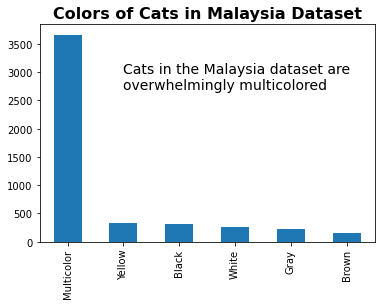

In [23]:
cat_malay_df['Color'].value_counts().plot(kind = 'bar')
plt.title(label = 'Colors of Cats in Malaysia Dataset', fontsize = 16, fontweight = 'bold')
plt.text(x = 1, y = 2_700, s = 'Cats in the Malaysia dataset are\noverwhelmingly multicolored', fontsize = 14)
plt.show()

This is similar for Malaysia dogs and Texas cats and dogs. Since multicolor is vague, we'll filter these out to make accurate comparisons to our adoption speed classifications.

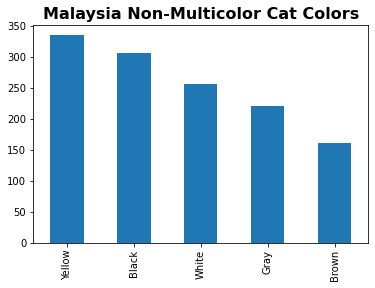

In [24]:
cat_malay_nomulti = cat_malay_df[cat_malay_df['Color'] != 'Multicolor']
dog_malay_nomulti = dog_malay_df[dog_malay_df['Color'] != 'Multicolor']

cat_texas_nomulti = cat_texas_df[cat_texas_df['Color'] != 'Multicolor']
dog_texas_nomulti = dog_texas_df[dog_texas_df['Color'] != 'Multicolor']

cat_malay_nomulti['Color'].value_counts().plot(kind = 'bar', title = 'Malaysia Non-Multicolor Cat Colors')
plt.title(label = 'Malaysia Non-Multicolor Cat Colors', fontsize = 16, fontweight = 'bold')
plt.show()

Now, we want to see the trends in adoption speed vs color of pets. First we need to format the data into we table we can use to build the visualizations.

In [25]:
def get_speed_vs_color_table(df):
    df_dict = {}
    df_index = ['< 1 week', '< 1 month', '< 3 months', '> 3 months']

    for col in ['Black', 'Brown', 'Gray', 'Yellow', 'White']:
        num_list = []
        speed_dict = dict(df[df['Color'] == col]['AdoptionSpeed'].value_counts())
        for speed in df_index:
            num_list.append(float(speed_dict[speed]))
        df_dict.update( { col : num_list })
            
    return pd.DataFrame(df_dict, index = df_index)

cat_malay_table = get_speed_vs_color_table(cat_malay_nomulti)
dog_malay_table = get_speed_vs_color_table(dog_malay_nomulti)

cat_texas_table = get_speed_vs_color_table(cat_texas_nomulti)
dog_texas_table = get_speed_vs_color_table(dog_texas_nomulti)

cat_malay_table

,Black,Brown,Gray,Yellow,White
< 1 week,78.0,55.0,53.0,105.0,84.0
< 1 month,79.0,41.0,67.0,89.0,78.0
< 3 months,55.0,29.0,42.0,55.0,36.0
> 3 months,93.0,36.0,58.0,85.0,58.0


Using these tables, we can plot our data. Here is a visualization for adoption speeds of cats in Malaysia:

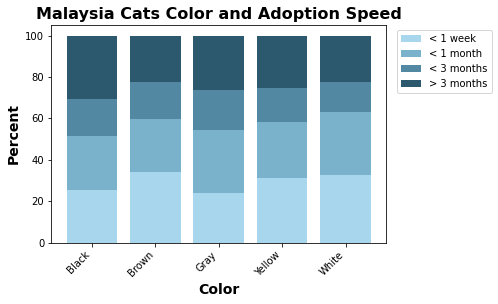

In [26]:
def plot_bar_stack_color(df, title, show_y = True):

    df_index = ['< 1 week', '< 1 month', '< 3 months', '> 3 months']
    colors = ['Black', 'Brown', 'Gray', 'Yellow', 'White']
    plot_colors = ['#a8d7ed', '#7ab2cc', '#5288a1', '#2d596e']
    arrays = {}

    for i, row in enumerate(df.to_numpy()):
        arrays.update( { df_index[i] : np.array(row) } )

    ind = [x for x, _ in enumerate(colors)]

    total = np.array([ 0.0, 0.0, 0.0, 0.0, 0.0 ])
    for array in arrays.values():
        total += array

    for i in range(len(total)):
        for key, item in arrays.items():
            arrays[key][i] = item[i] / total[i] * 100

    for i, category in enumerate(df_index):
        bottom = np.array([ 0.0, 0.0, 0.0, 0.0, 0.0 ])
        for j in range(i):
            bottom += arrays[df_index[j]]
        plt.bar(ind, arrays[category], width = 0.8, label = category, color = plot_colors[i], bottom = bottom)

    plt.xticks(ind, colors)
    if (show_y):
        plt.ylabel("Percent", fontsize = 14, fontweight = 'bold')
    plt.xlabel("Color", fontsize = 14, fontweight = 'bold')
    plt.title(title, fontsize = 16, fontweight = 'bold')
    plt.ylim = 1.0
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

    return plt

plt = plot_bar_stack_color(cat_malay_table, "Malaysia Cats Color and Adoption Speed")
plt.legend(loc="upper right", bbox_to_anchor=(1.33, 1.0))
plt.show()

For each of the 5 colors listed, we see the relative proportion of cats that take less than 1 week to be adopted, less than 1 month to be adopted, less than 3 months to be adopted, and greater than 3 months to be adopted. Overall there doesn't seem to be *too much* variance between cat colors, but it shows that black and gray cats in Malaysia have a higher average adoption speed times. Now, let's use this to compare the visualizations between cats and Malaysia and cats in Texas:

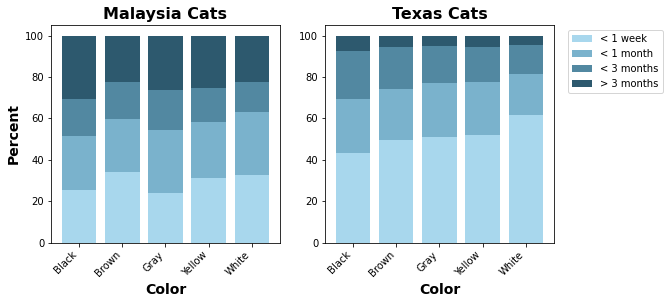

In [27]:
f, axs = plt.subplots(1, 2, figsize = (9,4))
plt.subplot(1, 2, 1)
plot_bar_stack_color(cat_malay_table, "Malaysia Cats")
plt.subplot(1, 2, 2)
plot_bar_stack_color(cat_texas_table, "Texas Cats", show_y = False)

plt.legend(loc="upper right", bbox_to_anchor=(1.5, 1.0))
plt.show()

We see that in Malaysia, cats (and dogs, as we'll see later) have a longer average stay in shelters compared to Texas. However, this only shows that the relative adoption rate of cats is higher in Texas. This is a nice observation, but it's not what we're after - we are looking for similarities and differences features that affect pet adoption trends between Malaysia and Texas. Interestingly, we note that black cats are more likely to spend a longer time in shelters compared to other colored cats in both Malaysia and Texas. We also note that white cats are more likely to have a shorter adoption time in Texas, while gray cats are more likely to have a longer adoption time in Malaysia. Overall these are sublte, but still considerable differences.

Now let's check the same thing for dogs:

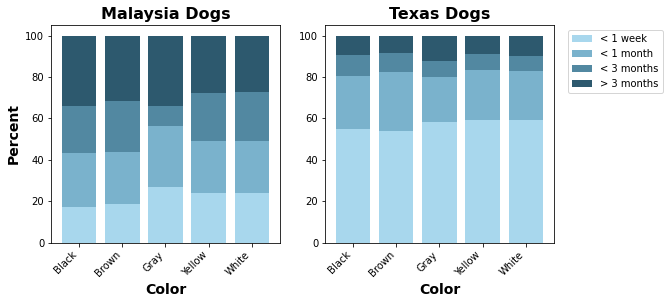

In [28]:
f, axs = plt.subplots(1, 2, figsize = (9,4))
plt.subplot(1, 2, 1)
plot_bar_stack_color(dog_malay_table, "Malaysia Dogs")
plt.subplot(1, 2, 2)
plot_bar_stack_color(dog_texas_table, "Texas Dogs", show_y = False)

plt.legend(loc="upper right", bbox_to_anchor=(1.5, 1.0))
plt.show()

Again, it's clear that pets have a longer average stay in Malaysia shelters compared to Texas shelters. Beyond this, we note that gray dogs are more likely to have longer stays in both Malaysia and Texas shelters. Additionally, darker colored dogs (black, brown, and gray) seem to have higher adoption times than lighter colored dogs (yellow and white) in Malaysia. Similar with cats these differences aren't massive, but they are still worth considering.

## Age vs Adoption Speed

Now we will visusalize how age affects adoption speed. Note that our age values are in months, rather than years. Let's see an initial visualization of the age distribution of `cat_malay_df`.

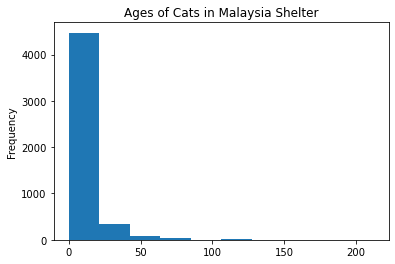

In [29]:
cat_malay_df['Age'].plot(kind = 'hist', title = 'Ages of Cats in Malaysia Shelter')
plt.show()

This data is very skewed, so let's look at the log of age instead. Note that some cats have an age of 0, so we plot `log10(age + 1)`.

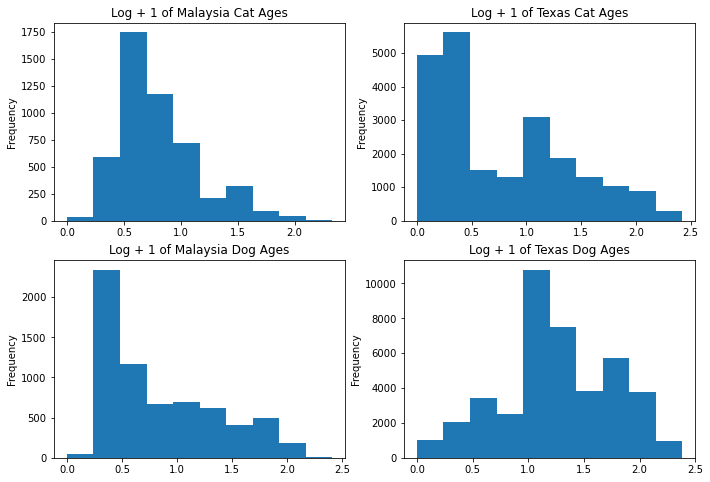

In [30]:
f, axs = plt.subplots(2, 2, figsize = (11.5,8))

cat_malay_df['Log_Age'] = cat_malay_df['Age'].apply(lambda x : np.log10(x + 1))
plt.subplot(2, 2, 1)
cat_malay_df['Log_Age'].plot(kind = 'hist', title = 'Log + 1 of Malaysia Cat Ages')

cat_texas_df['Log_Age'] = cat_texas_df['Age'].apply(lambda x : np.log10(x + 1))
plt.subplot(2, 2, 2)
cat_texas_df['Log_Age'].plot(kind = 'hist', title = 'Log + 1 of Texas Cat Ages')

dog_malay_df['Log_Age'] = dog_malay_df['Age'].apply(lambda x : np.log10(x + 1))
plt.subplot(2, 2, 3)
dog_malay_df['Log_Age'].plot(kind = 'hist', title = 'Log + 1 of Malaysia Dog Ages')

dog_texas_df['Log_Age'] = dog_texas_df['Age'].apply(lambda x : np.log10(x + 1))
plt.subplot(2, 2, 4)
dog_texas_df['Log_Age'].plot(kind = 'hist', title = 'Log + 1 of Texas Dog Ages')

plt.show()

Looks better. Let's briefly analyze the normality of this data. Some of these distributions don't look particularly normal, but let's run a test to be more rigorous to verify this. Running a Shapiro-Wilk normality test on each of these datasets yields:

In [31]:
cat_malay_stat, cat_malay_p = shapiro(cat_malay_df['Log_Age'])
dog_malay_stat, dog_malay_p = shapiro(dog_malay_df['Log_Age'])
cat_texas_stat, cat_texas_p = shapiro(cat_texas_df['Log_Age'])
dog_texas_stat, dog_texas_p = shapiro(dog_texas_df['Log_Age'])

print('Cat Malaysia: Statistics = %.3f, p-value = %.3f' % (cat_malay_stat, cat_malay_p))
print('Dog Malaysia: Statistics = %.3f, p-value = %.3f' % (dog_malay_stat, dog_malay_p))
print('Cat Texas: Statistics = %.3f, p-value = %.3f' % (cat_texas_stat, cat_texas_p))
print('Dog Texas: Statistics = %.3f, p-value = %.3f' % (dog_texas_stat, dog_texas_p))

Cat Malaysia: Statistics = 0.927, p-value = 0.000
Dog Malaysia: Statistics = 0.903, p-value = 0.000
Cat Texas: Statistics = 0.908, p-value = 0.000
Dog Texas: Statistics = 0.968, p-value = 0.000


Even assuming a conservative alpha value of 0.01, none of these ages are normal. Now let's analyze age vs adoption speed for cats in Malaysia vs cats in Texas. 

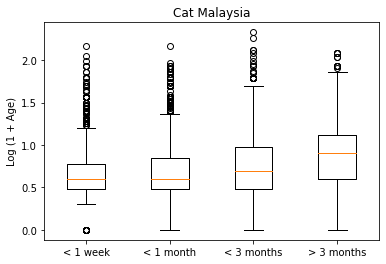

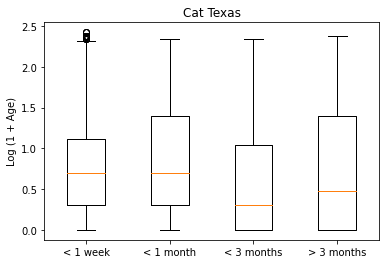

In [32]:
def box_plot_age_vs_speed(df, title):

    df_index = ['< 1 week', '< 1 month', '< 3 months', '> 3 months']
    data = []

    for col in df_index:
        data.append(df['Log_Age'][df['AdoptionSpeed'] == col])

    fig, ax = plt.subplots()
    ax.boxplot(data)
    ax.set_title(title)
    ax.set_xticklabels(df_index)
    ax.set_ylabel("Log (1 + Age)")

    plt.show()

box_plot_age_vs_speed(cat_malay_df, "Cat Malaysia")
box_plot_age_vs_speed(cat_texas_df, "Cat Texas")

First off, it is clear that higher age increases the likelihood of a longer adoption time for cats in Malaysia. Interestingly, this does not seem to be the case for cats in Texas. Cats adopted in under a month in Texas have a similar average age to those in Malaysia, cats that stay in shelters for over a month have a much lower average age compared to Malaysia.

Now let's do a similar analysis for dogs:

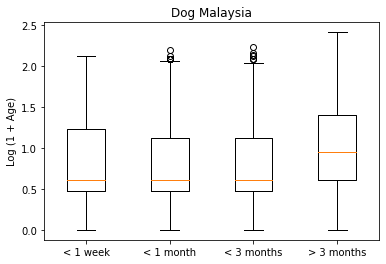

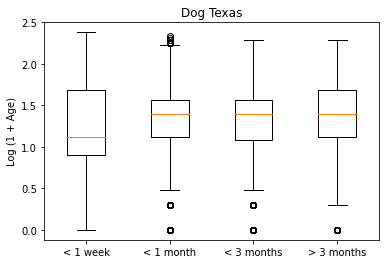

In [33]:
box_plot_age_vs_speed(dog_malay_df, "Dog Malaysia")
box_plot_age_vs_speed(dog_texas_df, "Dog Texas")

Here, we see a similar pattern in both charts: younger dogs are more likely to have quick adoptions compared to older dogs. However, there does seem to be a difference in exactly how age is favored. In Malaysia, dogs that spend over 3 months in the shelter have a much higher median age than dogs that spend less than 3 months. In Texas, only dogs that spend less than a week in shelters have a considerably lower median age.

## Gender vs Adoption Speed

As with color and age, let's get a feel for the data and check occurence of males vs females on each of our dataframes.

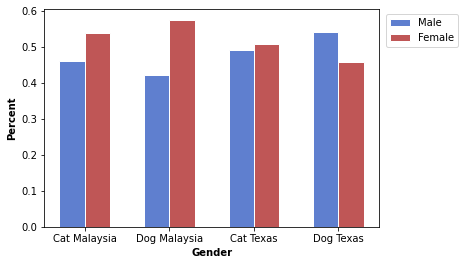

In [34]:
chart_index = ('Cat Malaysia', 'Dog Malaysia', 'Cat Texas', 'Dog Texas')
male_val = (cat_malay_df['Gender'][cat_malay_df['Gender'] == 'Male'].size / cat_malay_df.shape[0],
            dog_malay_df['Gender'][dog_malay_df['Gender'] == 'Male'].size / dog_malay_df.shape[0],
            cat_texas_df['Gender'][cat_texas_df['Gender'] == 'Male'].size / cat_texas_df.shape[0],
            dog_texas_df['Gender'][dog_texas_df['Gender'] == 'Male'].size / dog_texas_df.shape[0])
female_val = (cat_malay_df['Gender'][cat_malay_df['Gender'] == 'Female'].size / cat_malay_df.shape[0],
              dog_malay_df['Gender'][dog_malay_df['Gender'] == 'Female'].size / dog_malay_df.shape[0],
              cat_texas_df['Gender'][cat_texas_df['Gender'] == 'Female'].size / cat_texas_df.shape[0],
              dog_texas_df['Gender'][dog_texas_df['Gender'] == 'Female'].size / dog_texas_df.shape[0])
 
bar_width = 0.3
male_plot = np.arange(len(chart_index)) + 0.15
female_plot = [x + bar_width for x in male_plot]
 
plt.bar(male_plot, male_val, color='#5f7fcf', width=bar_width, edgecolor='white', label='Male')
plt.bar(female_plot, female_val, color='#bf5656', width=bar_width, edgecolor='white', label='Female')
 
plt.xlabel('Gender', fontweight='bold')
plt.ylabel('Percent', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(chart_index))], chart_index)
 
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1.0))
plt.show()

Overall female pets seem to be more common in Malaysia, whereas is more even (though, male dogs are considerably more common in Texas). Now we can analyze gender vs adoption speed of pets similar to what was done for color vs adoption speed. First, we create a table of gender vs adoption speed.

In [35]:
def get_speed_vs_gender_table(df):
    df_dict = {}
    df_index = ['< 1 week', '< 1 month', '< 3 months', '> 3 months']

    for col in ['Male', 'Female']:
        num_list = []
        speed_dict = dict(df[df['Gender'] == col]['AdoptionSpeed'].value_counts())
        for speed in df_index:
            num_list.append(float(speed_dict[speed]))
        df_dict.update( { col : num_list } )
            
    return pd.DataFrame(df_dict, index = df_index)

cat_malay_table_gender = get_speed_vs_gender_table(cat_malay_df)
dog_malay_table_gender = get_speed_vs_gender_table(dog_malay_df)

cat_texas_table_gender = get_speed_vs_gender_table(cat_texas_df)
dog_texas_table_gender = get_speed_vs_gender_table(dog_texas_df)

cat_malay_table_gender

,Male,Female
< 1 week,678.0,729.0
< 1 month,660.0,729.0
< 3 months,430.0,505.0
> 3 months,513.0,699.0


Using these tables, we can plot our data. First let's compare cats between Malaysia and Texas.

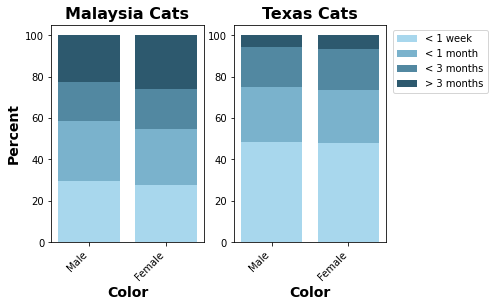

In [36]:
def plot_bar_stack_gender(df, title, show_y = True):

    df_index = ['< 1 week', '< 1 month', '< 3 months', '> 3 months']
    genders = ['Male', 'Female']
    plot_colors = ['#a8d7ed', '#7ab2cc', '#5288a1', '#2d596e']
    arrays = {}

    for i, row in enumerate(df.to_numpy()):
        arrays.update( { df_index[i] : np.array(row) } )

    ind = [x for x, _ in enumerate(genders)]

    total = np.array([ 0.0, 0.0 ])
    for array in arrays.values():
        total += array

    for i in range(len(total)):
        for key, item in arrays.items():
            arrays[key][i] = item[i] / total[i] * 100

    for i, category in enumerate(df_index):
        bottom = np.array([ 0.0, 0.0 ])
        for j in range(i):
            bottom += arrays[df_index[j]]
        plt.bar(ind, arrays[category], width = 0.8, label = category, color = plot_colors[i], bottom = bottom)

    plt.xticks(ind, genders)
    if (show_y):
        plt.ylabel("Percent", fontsize = 14, fontweight = 'bold')
    plt.xlabel("Color", fontsize = 14, fontweight = 'bold')
    plt.title(title, fontsize = 16, fontweight = 'bold')
    plt.ylim = 1.0
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

    return plt

f, axs = plt.subplots(1, 2, figsize = (6,4))
plt.subplot(1, 2, 1)
plot_bar_stack_gender(cat_malay_table_gender, "Malaysia Cats")
plt.subplot(1, 2, 2)
plot_bar_stack_gender(cat_texas_table_gender, "Texas Cats", show_y = False)

plt.legend(loc="upper right", bbox_to_anchor=(1.7, 1.0))
plt.show()

Fairly straightforward results: this shows that overall, male cats have a slightly favorable adoption speed compared to females. Now for dogs:

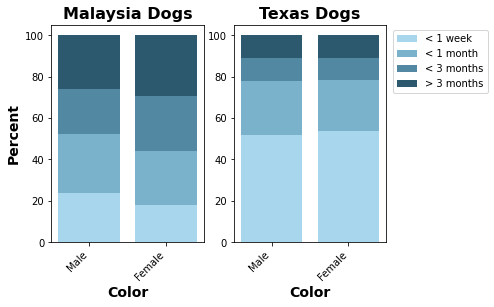

In [37]:
f, axs = plt.subplots(1, 2, figsize = (6,4))
plt.subplot(1, 2, 1)
plot_bar_stack_gender(dog_malay_table_gender, "Malaysia Dogs")
plt.subplot(1, 2, 2)
plot_bar_stack_gender(dog_texas_table_gender, "Texas Dogs", show_y = False)

plt.legend(loc="upper right", bbox_to_anchor=(1.7, 1.0))
plt.show()

This visualization shows that there is almost no preference for dog gender in Texas. However, in Malaysia, male dogs in Malaysia are somewhat more perferred over female dogs.

## Decision Tree

Since most of our data is categorical and our only numeric feature in our data is not normally distributed, we decided to go with an easy model to work with: decision trees. We wanted to see which features had the most statistical significance in terms of adoption speed so we're more concerned with interpreting the tree itself, rather than the performance of the tree (i.e., the tree's accuracy on a test set).

The decision tree model we're using requires our data to be numeric, so we have to encode the relavent features in our. While encoding, we can drop the data we don't need for building decision trees.

In [38]:
def encode_df(df):

    out_df = df.copy()
    # Male = 0, Female = 1
    out_df['Gender'] = out_df['Gender'].apply(lambda x : 0 if x == 'Male' else 1)
    # one-hot encoding for color
    for color in df['Color'].unique():
        out_df[color] = out_df['Color'].apply(lambda x : 1 if x == color else 0)

    out_df = out_df[out_df['Multicolor'] == 0]
    out_df = out_df.drop(['Type', 'Color', 'Log_Age', 'Multicolor', 'Color'], axis = 1)

    return out_df

encode_cat_malay_df = encode_df(cat_malay_df)
encode_dog_malay_df = encode_df(dog_malay_df)
encode_cat_texas_df = encode_df(cat_texas_df)
encode_dog_texas_df = encode_df(dog_texas_df)

encode_cat_malay_df.head()

,Age,Gender,AdoptionSpeed,Black,Gray,Brown,Yellow,White
6,12,0,< 1 week,1,0,0,0,0
8,2,1,< 1 week,0,1,0,0,0
16,6,1,< 3 months,0,0,1,0,0
25,36,0,< 1 month,0,0,0,1,0
26,2,0,< 1 week,0,0,0,1,0


Now we can build a decision tree out of these encoded dataframes. Note that we cannot simply combine the data for Malaysia and Texas since the adoption speeds in Texas are much higher. Instead, we have to create individual trees and compare them. Additionally, for ease of visualization and interpretation, we'll cap the tree height at 3.

Misclassified samples: 202
Accuracy: 36.68%


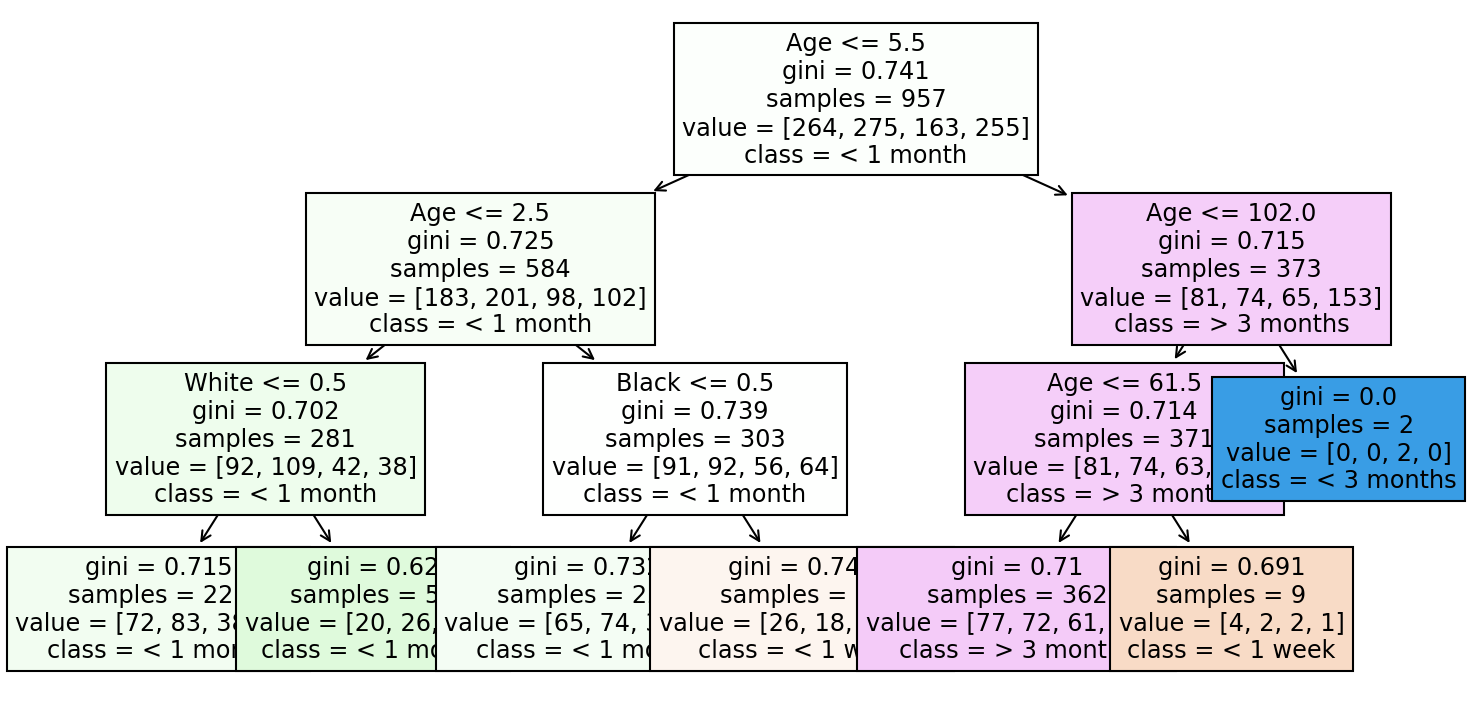

In [39]:
def build_decision_tree(df):

    X_train, X_test, Y_train, Y_test = train_test_split(df[['Age', 'Gender', 'Black', 'Brown', 'Gray', 'Yellow', 'White']], df['AdoptionSpeed'], random_state=0)

    clf = DecisionTreeClassifier(max_depth = 3, random_state = 0)

    clf.fit(X_train, Y_train)

    fn = ['Age', 'Gender', 'Black', 'Brown', 'Gray', 'Yellow', 'White']
    cn = ['< 1 week', '< 1 month', '< 3 months', '> 3 months']
    fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (12,6), dpi=150)

    Y_pred = clf.predict(X_test)
    count_misclassified = (Y_test != Y_pred).sum()
    print('Misclassified samples: {}'.format(count_misclassified))
    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    print('Accuracy: {:.2f}%'.format(accuracy * 100))

    tree.plot_tree(clf, feature_names = fn, class_names = cn, filled = True, fontsize=11.5)

build_decision_tree(encode_cat_malay_df)

 A quick note about the nodes in this tree:
 - The top line of non-leaf nodes is the question asked. Going left means answering 'yes' and going right means answering 'no'.
 - The next line (top line of leaf nodes) is the uncertainty value (we stuck with Gini-Index as the default).
 - The next line is the total number of pets that have the subsequent features of parent nodes.
 - The next line is the number of pets in the classification order: '< 1 week', '< 1 month', '< 3 months', '> 3 months'.
 - The last line is the prediction, which is made by taking the most frequent classification in the node.


### Accuracy Implications
As mentioned prior, the 36.68% accuracy isn't our focus, but it is still worth considering. Compared to the base-line of a randomized classifier that has a accuracy of 25%, this isn't terrible. However, 36.68% is still nothing remarkable. This accuracy suggests that color, age, and gender may not be features that can be used to well-predict a cat in Malaysia's adoption speed.

### Tree Implications
Given this, age seems to be the dominant feature in predicting adoption speed since all the nodes in the first two levels of the tree ask questions related to `Age`. In particular this decision tree shows that, cats under 5.5 months old (root node) have a `(183 + 201) / 584 = 65.7%` chance to be adopted in under one month, while `(81 + 74) / 373 = 41.6%` chance to be adopted in under one month. Factors other than age seem to have a minimal effect on classification distribution between subsequent nodes.

Now, we compare these findings to cats in Texas.

Misclassified samples: 1308
Accuracy: 50.85%


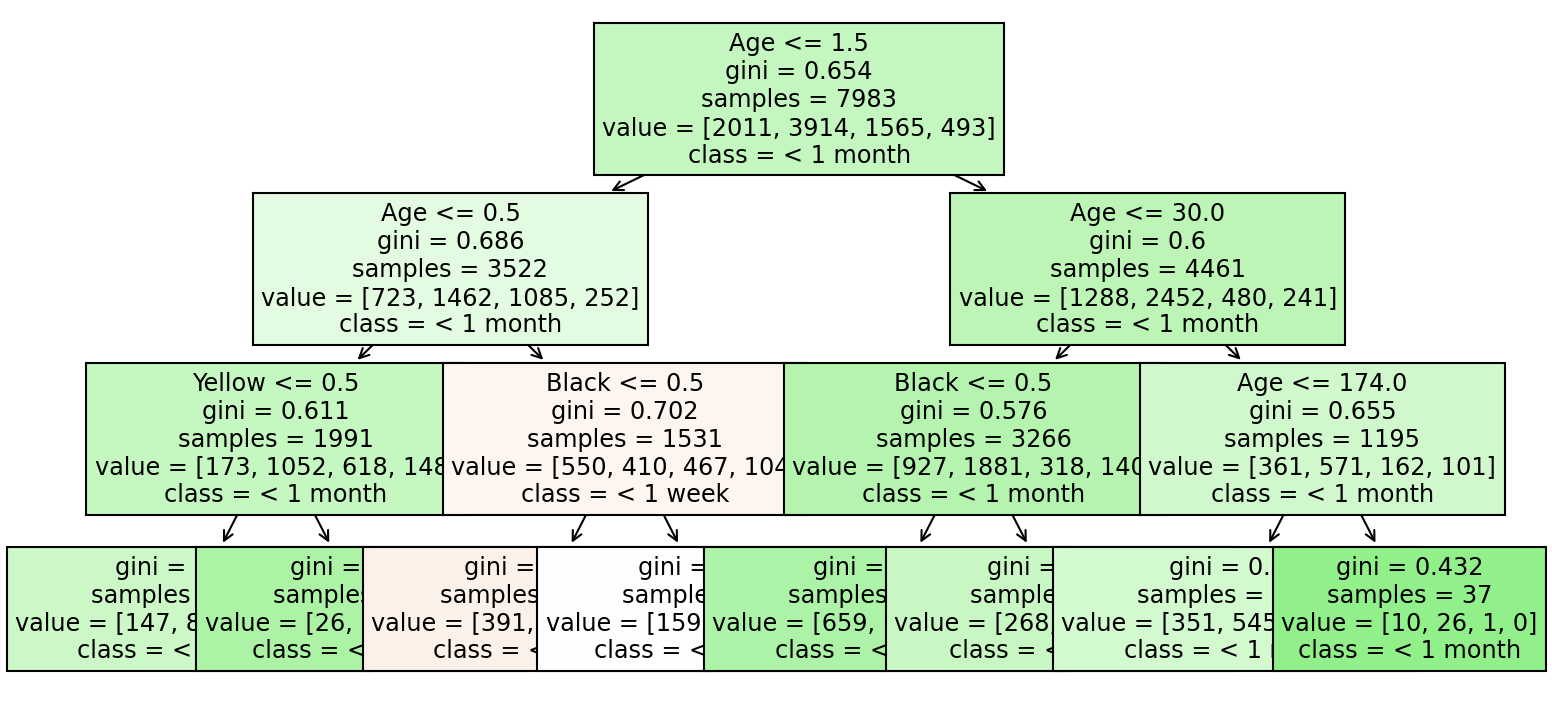

In [40]:
build_decision_tree(encode_cat_texas_df)

### Accuracy Implications
We see a much higher accuracy in for Texas cats. While an initial take may suggest that age, color, and gender may be better predictors for Texas cats, it is important to note that the majority of cats spend less than a month in Texas shelters. Considering 49% of cats spend between 1 week and 1 month in Texas shelters, we would approach this level of accuracy if we simply guessed `< 1 month` for every cat! So, again, the accuracy of this tree suggests these features may not accurately predict adoption speed.

### Tree Implications
Again, age seems to be the most important factor in classifying cat adoption speed. Color seems to be the next-most important factor in classification. Specifically, a cat's blackness is an important factor in the tree's decision. Additionally, black cats have less favorable adoption speeds according to the tree. While age is still more important than a cat's blackness (the root asks about age), this tree shows that being black is still a considerable factor in adoption speed for cats in Texas.

Next we do the same thing for dogs. First, dogs in Malaysia.

Misclassified samples: 423
Accuracy: 37.43%


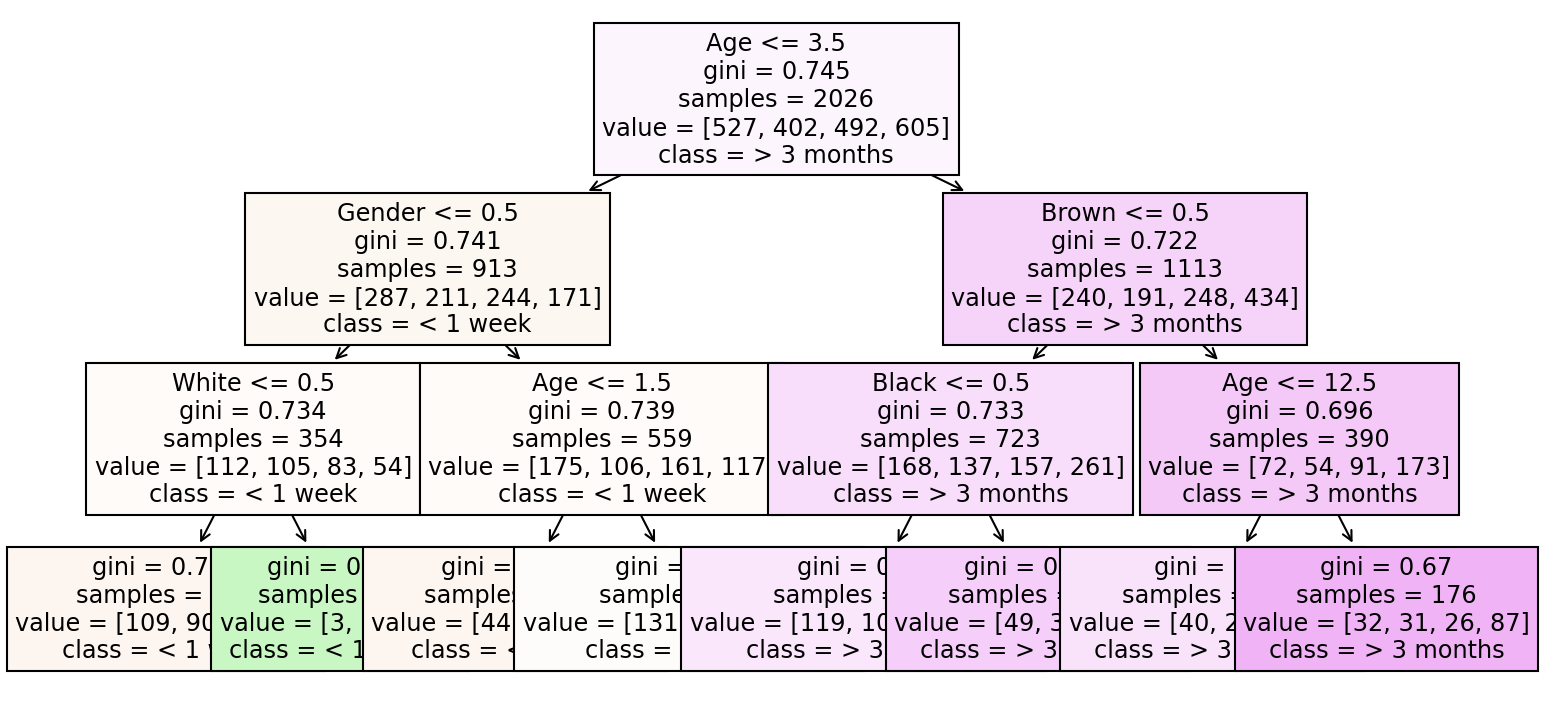

In [41]:
build_decision_tree(encode_dog_malay_df)

### Accuracy Implications
Similar to cats in Malaysia, this accuracy may suggest that these features may not be the best predictors of adoption speed.

### Tree Implications
Again, age seems to be a the dominant factor. Dogs over 3.5 months old have a considerably higher chance to spent over 3 months in a shelter (~39%) compared to dogs younger than 3.5 months (~18%). Passed this, this is the first tree that uses gender as a consideration for classification. However, the difference in distribution is small after considering gender, so it may be the case that there is a specific and significant cutoff for dog ages that make the largest impact on adoption speed.

Finally, we analyze dogs in Texas.

Misclassified samples: 1344
Accuracy: 56.02%


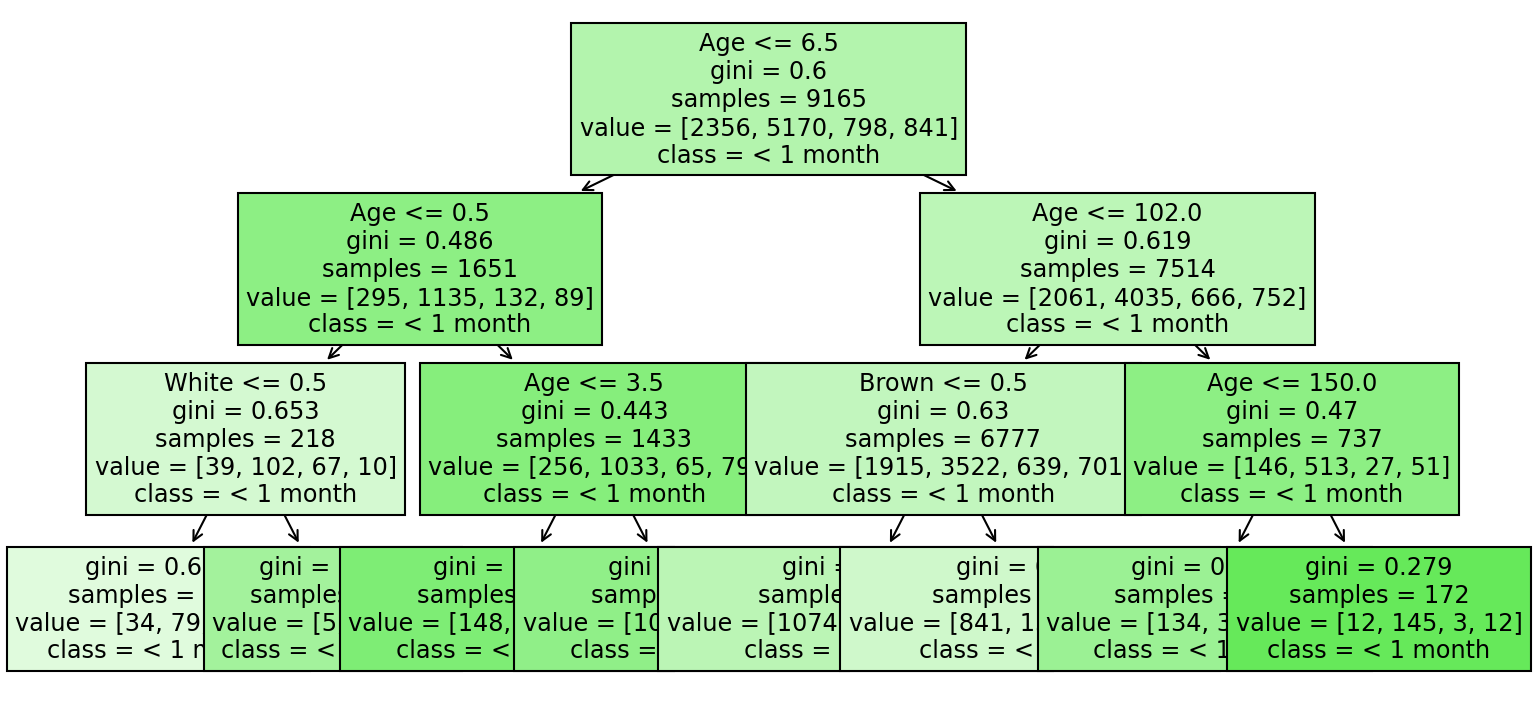

In [42]:
build_decision_tree(encode_dog_texas_df)

### Accuracy Implications
The majority of dogs in Texas are adopted within the 1 week to 1 month range. Notice that this tree has a 56% accuracy by classifying every dog as '< 1 months'! Again, this suggests these features may not be feasable in accurately predicting adoption speeds.

### Tree Implications
Again, we find that age is the dominant factor in the tree. Even nodes at depth 3 choose age as their separating factor, which suggests that other features of Texas dogs do not make much of a difference in adoption speed.

# Ethics & Privacy

The datasets we are using are publicly available through Kaggle, a crowdsourced platform for data scientists to share data. Regarding privacy, the datasets we looked into are all publicly released and contain no sensitive personal information. However our data does have potential to introduce various biases, such as:

Individual datasets all come from the same geographical location, which may introduce biases.
Datasets may not be large enough to include all breeds of cats and dogs.
It is possible that the data has been falsified in order to increase adoption rates for specific dogs or cats.

If we were to use biased data in our analysis, there could be numerous unintended consequences. For example, say our data was biased towards the adoption rates of black cats - that is, our hypothetical dataset falsely reported quicker times for the adoption of black cats. If people view our analysis and conclusion, they might be more inclined to adopt a black cat over a different cat with the idea that the black cat is less likely to be adopted. However, if our data is biased, this will end up having the opposite effect our reader wanted.

# Conclusion & Discussion

Here are our overall results:
 - **Cat Similarities**: age is the most important factor in adoption speed, while black cats are less favored.
 - **Cat Differences**: No significant differences.
 - **Dog Similarities**: again, age is the most important factor in adoption speed.
 - **Dog Differences**: male dogs are slightly more favored in Malaysia, while gender makes nearly no difference in Texas.

Overall, age seems to be the best feature out of age, color, and gender to predict adoption speeds of both cats and dogs. However, we believe it is important to note that none of these features predict adoption speed particularly reliably.

Our results mostly match our original hypothesis, but we believed the effects of certain features would have had a higher impact on the predictability of adoption speeds.

# Team Contributions

Regarding our process, we started our first team meeting by trying to come up with possible project ideas and ways to obtain the datasets. Maria suggested that we make our project about pet adoption rates. After agreeing on our topic, we began to meet up weekly to discuss which graph representations we should focus on. Elisa came up with the idea of using a stacked barplot to represent the colors of the pets in our dataset due to the large variety of colors and adoption rates. We then started to come up with all the other visualization types that we would need. Brandon suggested that a boxplot could help us visualize the relationship between age and adoption speed. When we reached the data analysis stage of our project, we found ourselves stuck on how to proceed. Thus, we took advantage of the course office hours and were able to settle on the use of a decision tree. Finally, every one of us worked together to analyze the decision trees and came up with our conclusion.